In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools
from collections.abc import Iterable

import traceback

sns.set_style("darkgrid")

pd.set_option('max_columns', 50)

import warnings

warnings.filterwarnings('ignore')

In [2]:
def flatten_list(l):
    
    def flatten(l):
        for el in l:
            if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
                yield from flatten(el)
            else:
                yield el
                
    flat_l = flatten(l)
    
    return list(flat_l)

In [3]:
def get_relevant_columns_by_config(config, dataframe):
    try:
        if config['i_net_nas'] == False:
            config.pop('i_net_nas_trials')
    except:
        pass
    
    for key, value in config.items():
        try:
            if isinstance(value, list):
                if isinstance(value[0], str):
                    dataframe_string_query = key + ' == "' + str(value[0]) + '"'
                    for dataframe_string in value[1:]:
                        dataframe_string_query += ' | ' + key + ' == "' + str(dataframe_string) + '"'

                    dataframe = dataframe.query(dataframe_string_query)
                else:
                    dataframe = dataframe[dataframe[key].isin(value)]
                    
            else:
                dataframe = dataframe[dataframe[key] == value]
        except:
            traceback.print_exc()
        
    return dataframe


In [4]:
def plot_results(data_reduced, col, x, y, hue, plot_type=sns.barplot, aspect=1.5, col_wrap=2):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=col_wrap,
                      aspect=aspect,
                      ##legend_out=False,
                     )    
    indexes = np.unique(data_reduced[hue], return_index=True)[1]
    hue_order = [data_reduced[hue].values[index] for index in sorted(indexes)]
        
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=hue_order,#np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          #order=data_reduced[order_columnname],
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

In [5]:
#results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
#results_complete = results_complete[results_complete['i_net_nas'] == True]
#results_complete_columns = list(results_complete.columns)

#results_summary = pd.read_csv('./results_summary-TEST.csv', delimiter=';')
results_summary = pd.read_csv('./results_summary.csv', delimiter=';')
#results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)
results_summary['function_family_decision_sparsity'][results_summary['data_number_of_variables'] == results_summary['function_family_decision_sparsity']] = -1


results_summary.head(5)

,function_family_maximum_depth,function_family_beta,function_family_decision_sparsity,function_family_fully_grown,function_family_dt_type,function_family_basic_function_representation_length,function_family_function_representation_length,data_number_of_variables,data_num_classes,data_categorical_indices,data_use_distribution_list,data_random_parameters_distribution,data_max_distributions_per_class,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,data_dt_type_train,data_maximum_depth_train,data_decision_sparsity_train,data_function_generation_type,data_distribution_list,data_distribution_list_eval,data_objective,data_x_max,...,max_distance_to_neuron_average_Brest Cancer Wisconsin,max_distance_to_neuron_average_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_average_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_average_Abalone,max_distance_to_neuron_average_Car,max_distance_to_neuron_average_train,max_distance_to_neuron_average_valid,max_distance_to_neuron_average_test,max_distance_to_neuron_min_Adult,max_distance_to_neuron_min_Titanic,max_distance_to_neuron_min_Absenteeism,max_distance_to_neuron_min_Loan House,max_distance_to_neuron_min_Loan Credit,max_distance_to_neuron_min_Medical Insurance,max_distance_to_neuron_min_Bank Marketing,max_distance_to_neuron_min_Cervical Cancer,max_distance_to_neuron_min_Brest Cancer Wisconsin,max_distance_to_neuron_min_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_min_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_min_Abalone,max_distance_to_neuron_min_Car,max_distance_to_neuron_min_train,max_distance_to_neuron_min_valid,max_distance_to_neuron_min_test,Unnamed: 5647
0,3,1,1,True,vanilla,22,456,32,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,1.504052,1.365708,1.868978,NaN,NaN,NaN,NaN,10.712486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.108442,1.344026,NaN
1,3,1,1,True,vanilla,22,232,16,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,2.717042,2.338828,3.441848,NaN,NaN,NaN,0.511433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.442653,2.562072,NaN
2,3,1,1,True,vanilla,22,400,28,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,1.477657,1.467840,2.015849,3.04541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.640256,1.373284,NaN
3,3,1,-1,True,SDT,135,135,16,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,2.717042,2.338828,3.441848,NaN,NaN,NaN,0.511433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.442653,2.562072,NaN
4,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,2.267501,2.346413,3.057670,NaN,NaN,0.422905,NaN,NaN,NaN,NaN,1.395616,NaN,NaN,NaN,NaN,NaN,0.0,1.325186,2.059324,NaN


In [6]:
results_summary.head(5)

,function_family_maximum_depth,function_family_beta,function_family_decision_sparsity,function_family_fully_grown,function_family_dt_type,function_family_basic_function_representation_length,function_family_function_representation_length,data_number_of_variables,data_num_classes,data_categorical_indices,data_use_distribution_list,data_random_parameters_distribution,data_max_distributions_per_class,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,data_dt_type_train,data_maximum_depth_train,data_decision_sparsity_train,data_function_generation_type,data_distribution_list,data_distribution_list_eval,data_objective,data_x_max,...,max_distance_to_neuron_average_Brest Cancer Wisconsin,max_distance_to_neuron_average_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_average_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_average_Abalone,max_distance_to_neuron_average_Car,max_distance_to_neuron_average_train,max_distance_to_neuron_average_valid,max_distance_to_neuron_average_test,max_distance_to_neuron_min_Adult,max_distance_to_neuron_min_Titanic,max_distance_to_neuron_min_Absenteeism,max_distance_to_neuron_min_Loan House,max_distance_to_neuron_min_Loan Credit,max_distance_to_neuron_min_Medical Insurance,max_distance_to_neuron_min_Bank Marketing,max_distance_to_neuron_min_Cervical Cancer,max_distance_to_neuron_min_Brest Cancer Wisconsin,max_distance_to_neuron_min_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_min_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_min_Abalone,max_distance_to_neuron_min_Car,max_distance_to_neuron_min_train,max_distance_to_neuron_min_valid,max_distance_to_neuron_min_test,Unnamed: 5647
0,3,1,1,True,vanilla,22,456,32,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,1.504052,1.365708,1.868978,NaN,NaN,NaN,NaN,10.712486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.108442,1.344026,NaN
1,3,1,1,True,vanilla,22,232,16,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,2.717042,2.338828,3.441848,NaN,NaN,NaN,0.511433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.442653,2.562072,NaN
2,3,1,1,True,vanilla,22,400,28,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,1.477657,1.467840,2.015849,3.04541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.640256,1.373284,NaN
3,3,1,-1,True,SDT,135,135,16,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,2.717042,2.338828,3.441848,NaN,NaN,NaN,0.511433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.442653,2.562072,NaN
4,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,True,False,False,vanilla,4,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']","['uniform', 'normal', 'gamma', 'beta', 'poisson']",classification,1,...,NaN,NaN,NaN,NaN,NaN,2.267501,2.346413,3.057670,NaN,NaN,0.422905,NaN,NaN,NaN,NaN,1.395616,NaN,NaN,NaN,NaN,NaN,0.0,1.325186,2.059324,NaN


In [7]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_maximum_depth_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_function_generation_type',
                  'data_categorical_indices',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_learning_rate',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'i_net_nas',
                  'i_net_nas_trials',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [8]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

results_summary_inet.head(10)

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_inet_scores_soft_binary_crossentropy,train_inet_scores_soft_binary_crossentropy_median,train_inet_scores_binary_crossentropy,...,inet_scores_soft_binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_accuracy_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_f1_score_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_runtime_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_accuracy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_f1_score_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_runtime_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_accuracy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_f1_score_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_runtime_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Abalone_TRAIN_DATA,inet_scores_binary_crossentropy_Abalone_TRAIN_DATA,inet_scores_accuracy_Abalone_TRAIN_DATA,inet_scores_f1_score_Abalone_TRAIN_DATA,inet_scores_runtime_Abalone_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Car_TRAIN_DATA,inet_scores_binary_crossentropy_Car_TRAIN_DATA,inet_scores_accuracy_Car_TRAIN_DATA,inet_scores_f1_score_Car_TRAIN_DATA,inet_scores_runtime_Car_TRAIN_DATA
0,3,1,vanilla,vanilla,4,32,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.660122,0.666007,0.638374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1,vanilla,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.628579,0.633279,0.585369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,vanilla,vanilla,4,28,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.635898,0.651587,0.600849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-1,SDT,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.326802,0.320181,0.027970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1,vanilla,vanilla,4,15,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.665071,0.675404,0.654500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,-1,SDT,vanilla,4,28,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.318859,0.318208,0.011722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,1,vanilla,vanilla,4,29,0,distribution,[],[128],adam,"

In [9]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten_list([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])
results_summary_inet.insert(0, 'technique', ['inet' for _ in range(results_summary_inet.shape[0])])

    
print(results_summary_inet.shape)
results_summary_inet.head(20)

(32, 484)


,technique,dt_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,...,soft_binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,accuracy_Brest Cancer Wisconsin_TRAIN_DATA,f1_score_Brest Cancer Wisconsin_TRAIN_DATA,runtime_Brest Cancer Wisconsin_TRAIN_DATA,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,accuracy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,f1_score_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,runtime_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,soft_binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,accuracy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,f1_score_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,runtime_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,soft_binary_crossentropy_Abalone_TRAIN_DATA,binary_crossentropy_Abalone_TRAIN_DATA,accuracy_Abalone_TRAIN_DATA,f1_score_Abalone_TRAIN_DATA,runtime_Abalone_TRAIN_DATA,soft_binary_crossentropy_Car_TRAIN_DATA,binary_crossentropy_Car_TRAIN_DATA,accuracy_Car_TRAIN_DATA,f1_score_Car_TRAIN_DATA,runtime_Car_TRAIN_DATA
0,inet,vanilla1,3,1,vanilla,vanilla,4,32,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.660122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,inet,vanilla1,3,1,vanilla,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.628579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,inet,vanilla1,3,1,vanilla,vanilla,4,28,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.635898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,inet,SDT-1,3,-1,SDT,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.326802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,inet,vanilla1,3,1,vanilla,vanilla,4,15,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.665071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,inet,SDT-1,3,-1,SDT,vanilla,4,28,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.318859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,inet,vanilla1,3,1,vanilla,vanilla,4,29,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.619814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inet,SDT-1,3,-1,SDT,vanilla,4,29,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.319002,...,NaN

In [10]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten_list([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten_list([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])
results_summary_dt_distilled.insert(0, 'technique', ['distilled' for _ in range(results_summary_dt_distilled.shape[0])])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled.head(15)


(32, 2786)


,technique,dt_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,...,runtime_normal_Car_TRAIN_DATA,soft_binary_crossentropy_gamma_Car_TRAIN_DATA,binary_crossentropy_gamma_Car_TRAIN_DATA,accuracy_gamma_Car_TRAIN_DATA,f1_score_gamma_Car_TRAIN_DATA,runtime_gamma_Car_TRAIN_DATA,soft_binary_crossentropy_beta_Car_TRAIN_DATA,binary_crossentropy_beta_Car_TRAIN_DATA,accuracy_beta_Car_TRAIN_DATA,f1_score_beta_Car_TRAIN_DATA,runtime_beta_Car_TRAIN_DATA,soft_binary_crossentropy_poisson_Car_TRAIN_DATA,binary_crossentropy_poisson_Car_TRAIN_DATA,accuracy_poisson_Car_TRAIN_DATA,f1_score_poisson_Car_TRAIN_DATA,runtime_poisson_Car_TRAIN_DATA,soft_binary_crossentropy_Car_TRAIN_DATA,binary_crossentropy_Car_TRAIN_DATA,accuracy_Car_TRAIN_DATA,f1_score_Car_TRAIN_DATA,soft_binary_crossentropy_std_Car_TRAIN_DATA,binary_crossentropy_std_Car_TRAIN_DATA,accuracy_std_Car_TRAIN_DATA,f1_score_std_Car_TRAIN_DATA,runtime_Car_TRAIN_DATA
0,distilled,vanilla1,3,1,vanilla,vanilla,4,32,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.662880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,distilled,vanilla1,3,1,vanilla,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.576143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,distilled,vanilla1,3,1,vanilla,vanilla,4,28,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.669791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,distilled,SDT-1,3,-1,SDT,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.378500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,distilled,vanilla1,3,1,vanilla,vanilla,4,15,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.570602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,distilled,SDT-1,3,-1,SDT,vanilla,4,28,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.324042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,distilled,vanilla1,3,1,vanilla,vanilla,4,29,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.615961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,distilled,SDT-1,3,-1,SDT,vanilla,4,29,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.322613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,distilled,SDT-1,3,-1,SDT,vanilla,4,32,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,

In [11]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced.head(5)

,technique,dt_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,...,runtime_uniform_Car_TRAIN_DATA,soft_binary_crossentropy_normal_Car_TRAIN_DATA,binary_crossentropy_normal_Car_TRAIN_DATA,accuracy_normal_Car_TRAIN_DATA,f1_score_normal_Car_TRAIN_DATA,runtime_normal_Car_TRAIN_DATA,soft_binary_crossentropy_gamma_Car_TRAIN_DATA,binary_crossentropy_gamma_Car_TRAIN_DATA,accuracy_gamma_Car_TRAIN_DATA,f1_score_gamma_Car_TRAIN_DATA,runtime_gamma_Car_TRAIN_DATA,soft_binary_crossentropy_beta_Car_TRAIN_DATA,binary_crossentropy_beta_Car_TRAIN_DATA,accuracy_beta_Car_TRAIN_DATA,f1_score_beta_Car_TRAIN_DATA,runtime_beta_Car_TRAIN_DATA,soft_binary_crossentropy_poisson_Car_TRAIN_DATA,binary_crossentropy_poisson_Car_TRAIN_DATA,accuracy_poisson_Car_TRAIN_DATA,f1_score_poisson_Car_TRAIN_DATA,runtime_poisson_Car_TRAIN_DATA,soft_binary_crossentropy_std_Car_TRAIN_DATA,binary_crossentropy_std_Car_TRAIN_DATA,accuracy_std_Car_TRAIN_DATA,f1_score_std_Car_TRAIN_DATA
0,inet,vanilla1,3,1,vanilla,vanilla,4,32,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.660122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,inet,vanilla1,3,1,vanilla,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.628579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,inet,vanilla1,3,1,vanilla,vanilla,4,28,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.635898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,inet,SDT-1,3,-1,SDT,vanilla,4,16,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,1,None,False,60,make_classification,0,0.326802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,inet,vanilla1,3,1,vanilla,vanilla,4,15,0,distribution,[],[128],adam,"[1792, 512, 512]","[0, 0, 0.5]",0.001,binary_crossentropy,10000,3,None,False,60,make_classification,0,0.665071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
config = {
    'i_net_dense_layers': ['[1792, 512, 512]'],#['[1024, 1024, 256, 2048, 2048]'],#
    'i_net_loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    #'data_noise_injected_level': 0.2, #0, 0.2
    #'data_data_noise': 0.1,

    'i_net_nas': False, # 'True', 'False'
    'i_net_nas_trials': 20, #20, 100

    #'data_number_of_variables': [unique_value], # [10]
    'function_family_maximum_depth': [3, 4, 5], # [3, 4, 5]
}

In [13]:
score_names_list = ['valid_accuracy', 'valid_binary_crossentropy', 'valid_f1_score']
valid_scores_columns = [name for name in results_summary_reduced_columns if 'valid' in name and any([score in name for score in score_names_list])]
valid_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
valid_columns = flatten_list([valid_identifier_columns, valid_scores_columns])

valid_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
valid_scores_df = valid_scores_df[valid_columns]
valid_scores_df = valid_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
valid_scores_df.head(20)


,dt_type,data_number_of_variables,technique,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median
44,SDT-1,9,distilled,0.460930,0.236078,0.828880,0.9368,0.694853,0.936146
12,SDT-1,9,inet,0.126086,0.098413,0.961120,0.9736,0.963269,0.974142
45,SDT-1,10,distilled,0.479486,0.153839,0.852000,0.9668,0.773796,0.966476
13,SDT-1,10,inet,0.115294,0.069300,0.965600,0.9824,0.967639,0.982455
43,SDT-1,15,distilled,0.224256,0.017801,0.945760,0.9988,0.896025,0.998807
11,SDT-1,15,inet,0.042049,0.032409,0.989280,0.9924,0.989255,0.992384
35,SDT-1,16,distilled,0.165619,0.021275,0.948560,0.9984,0.898719,0.998413
3,SDT-1,16,inet,0.086335,0.038501,0.975760,0.9916,0.977396,0.991606
37,SDT-1,28,distilled,0.020176,0.013344,0.999840,1.0000,0.999840,1.000000
5,SDT-1,28,inet,0.014867,0.010320,0.997280,0.9984,0.997253,0.998400


In [14]:
if False:
    real_world_datasets = {
                            'Adult': 28,#65,
                            'Titanic': 9,
                            'Absenteeism': 15,
                            'Loan House': 16,#17,
                            'Loan Credit': 32,
                            'Medical Insurance': 9,#6,
                            'Bank Marketing': 29,#17,
                            'Cervical Cancer': 15,
                            'Brest Cancer Wisconsin': 9,
                            'Wisconsin Diagnostic Breast Cancer': 10,
                            'Wisconsin Prognostic Breast Cancer': 10,
                            'Abalone': 10,
                            #'Car': 21,
                           }
    real_world_datasets = dict(sorted(real_world_datasets.items(), key=lambda item: item[1]))
else:
    real_world_datasets = {
                        'Adult': 28,#65,
                        'Titanic': 9,
                            'Absenteeism': 15,
                            'Loan House': 16,#17,
                            #'Loan Credit': 32,
                        'Medical Insurance': 9,#6,
                            'Bank Marketing': 29,#17,
                        'Cervical Cancer': 15,
                            'Brest Cancer Wisconsin': 9,
                            'Wisconsin Diagnostic Breast Cancer': 10,
                            #'Wisconsin Prognostic Breast Cancer': 10,
                            #'Abalone': 10,
                            ##'Car': 21,
                           }
    real_world_datasets = dict(sorted(real_world_datasets.items(), key=lambda item: item[1]))

In [15]:
real_world_dataset_names = list(real_world_datasets.keys())
score_names_list = ['accuracy']#['accuracy', 'binary_crossentropy', 'f1_score']
real_world_scores_columns = [name for name in results_summary_reduced_columns if any([score in name for score in score_names_list]) and 'soft' not in name and any([dataset_name in name for dataset_name in real_world_dataset_names])]
real_world_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
real_world_columns = flatten_list([real_world_identifier_columns, real_world_scores_columns])

real_world_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
real_world_scores_df = real_world_scores_df[real_world_columns]
real_world_scores_df = real_world_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
#real_world_scores_df.head(20)


In [16]:
distribution_list = ['uniform', 'gamma', 'beta', 'poisson', 'normal']

columns = flatten_list(['dt_type', 'technique', 'enumerator', 'distrib', [[real_world_dataset_name + ' ' + score_name for real_world_dataset_name in real_world_datasets.keys()] for score_name in score_names_list]])
#print(np.array(columns).shape)
#columns = np.hstack([columns for i in range(5)])
#print(np.array(columns).shape)

number_of_random_evaluations_per_distribution = 1
for column in real_world_columns:
    column_split = column.split('.')
    value = 0
    try:
        value = int(column_split[-1])
    except:
        pass
    if value > number_of_random_evaluations_per_distribution:
        number_of_random_evaluations_per_distribution = value
    

empty_data_distilled = np.array([np.vstack([
             [flatten_list(['vanilla1', 'distilled', i, distrib, [np.nan for _ in range(len(columns)-4)]]) for i in range(number_of_random_evaluations_per_distribution+1)],
             #[flatten_list(['SDT1',  'distilled', 0, distrib, [np.nan for _ in range(len(columns)-4)]]) for i in range(number_of_random_evaluations_per_distribution+1)]
             [flatten_list(['SDT-1',  'distilled', i, distrib, [np.nan for _ in range(len(columns)-4)]]) for i in range(number_of_random_evaluations_per_distribution+1)]
            ]) for distrib in distribution_list] )

empty_data_distilled = empty_data_distilled.reshape(empty_data_distilled.shape[0]*empty_data_distilled.shape[1], -1)

empty_data_inet = np.array([
                    flatten_list(['vanilla1', 'inet', np.nan, 'inet', [np.nan for _ in range(len(columns)-4)]]),
                    #flatten_list(['SDT1', 'inet', 'inet', [np.nan for _ in range(len(columns)-4)]]),
                    flatten_list(['SDT-1', 'inet', np.nan, 'inet', [np.nan for _ in range(len(columns)-4)]]),
                  ])

empty_data = np.vstack([empty_data_inet, empty_data_distilled])
empty_data[:,4:] = np.nan_to_num(x=empty_data[:,4:].astype(np.float64), nan=0)

real_world_scores_df_distrib_adjusted = pd.DataFrame(data=empty_data, columns=columns)


for real_world_dataset_name, real_world_dataset_variables in real_world_datasets.items():
    #scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]

    if real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables].shape[0] > 1:
        scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]
        for i, row in real_world_scores_df_distrib_adjusted.iterrows():
            for score_name in score_names_list:
                relevant_column = None
                for column_name in real_world_scores_df.columns:
                    if (row['distrib'] in column_name and 
                        real_world_dataset_name in column_name and 
                        score_name in column_name and 
                        '10000' in column_name and 
                        '100000' not in column_name and 
                        'std' not in column_name):
                        try:
                            row['enumerator'] = int(row['enumerator'])
                        except:
                            pass
                        
                        if '.' + str(row['enumerator']) in column_name or ('.' not in column_name and row['enumerator'] == 0):
                            if relevant_column is None:
                                relevant_column = column_name
                            else:
                                print('DOUBLE', relevant_column, column_name)
                                print("row['enumerator']", row['enumerator'])
                try:
                    if row['technique'] == 'distilled':
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]

                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)
                    else:
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]
                        relevant_column = score_name + '_' + real_world_dataset_name + '_10000'
                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)                            

                except:
                    pass
                    #print(scores_by_variables_selected[relevant_column])
                    #traceback.print_exc()

real_world_scores_df_distrib_adjusted.iloc[:,4:] = real_world_scores_df_distrib_adjusted.iloc[:,4:].astype(float)
#real_world_scores_df_distrib_adjusted.head(100)           

In [17]:
data = []

for row in real_world_scores_df_distrib_adjusted.query('technique == "inet"').values:
    
    row_inet_identifier = row[:4]
    row_inet_mean = row[4:]
    row_inet_std = np.zeros_like(row_inet_mean)
    
    row_inet_mean_std = np.dstack([row_inet_mean, row_inet_std]).flatten()

    row_inet = np.hstack([row_inet_identifier, row_inet_mean_std])    
    data.append(row_inet)
    
for dt_type in real_world_scores_df_distrib_adjusted['dt_type'].unique():
    rows_selected = real_world_scores_df_distrib_adjusted.query('dt_type == "' + dt_type + '" & technique == "distilled"')
    rows_selected_values = rows_selected.values[:,4:]

    row_identifier = [dt_type, 'distilled', np.nan, 'distilled']

    row_values_mean = np.mean(rows_selected_values.astype(np.float64), axis=0)
    row_values_std = np.std(rows_selected_values.astype(np.float64), axis=0)

    row_values_mean_std = np.dstack([row_values_mean, row_values_std]).flatten()
    #print(rows_selected.values)
    row_mean_std = np.hstack([row_identifier, row_values_mean_std])
    data.append(row_mean_std)
        
for distrib in distribution_list:
    for dt_type in real_world_scores_df_distrib_adjusted['dt_type'].unique():
        rows_selected = real_world_scores_df_distrib_adjusted.query('dt_type == "' + dt_type + '" & distrib == "' + distrib + '"')
        rows_selected_values = rows_selected.values[:,4:]
        row_identifier = [dt_type, 'distilled', np.nan, distrib]
        
        row_values_mean = np.mean(rows_selected_values.astype(np.float64), axis=0)
        row_values_std = np.std(rows_selected_values.astype(np.float64), axis=0)

        row_values_mean_std = np.dstack([row_values_mean, row_values_std]).flatten()
        
        row_mean_std = np.hstack([row_identifier, row_values_mean_std])
        data.append(row_mean_std)
        
columns = flatten_list([list(real_world_scores_df_distrib_adjusted.columns[:4]), [ [column + ' Mean', column + ' STD'] for column in real_world_scores_df_distrib_adjusted.columns[4:]]])
        
real_world_scores_df_distrib_adjusted_mean_std = pd.DataFrame(data=data, columns=columns)
real_world_scores_df_distrib_adjusted_mean_std.iloc[:,4:] = np.round(real_world_scores_df_distrib_adjusted_mean_std.iloc[:,4:].values.astype(np.float64), 4)
real_world_scores_df_distrib_adjusted_mean_std = real_world_scores_df_distrib_adjusted_mean_std.drop('enumerator', axis=1)
#display(real_world_scores_df_distrib_adjusted_mean_std.head(100))



In [18]:
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std.query('dt_type == "vanilla1"')
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.drop('dt_type', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.drop('technique', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA.index = real_world_scores_df_distrib_adjusted_mean_std_VANILLA['distrib']
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.drop('distrib', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.T

data = []
for i in range(real_world_scores_df_distrib_adjusted_mean_std_VANILLA.shape[0]//2):
    row_mean = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.iloc[i*2].values
    row_std = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.iloc[i*2+1].values
    
    row_values_mean_std = np.dstack([row_mean, row_std]).flatten()
    data.append(row_values_mean_std)
    
columns = flatten_list([ [column + ' mean', column + ' std']  for column in real_world_scores_df_distrib_adjusted_mean_std_VANILLA.columns])

index = real_world_scores_df_distrib_adjusted.columns[4:]
index = [name.replace(' accuracy', '') for name in index]
index = [index + ' (n='+  str(real_world_datasets[index]) + ')' for index in index]

real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended = pd.DataFrame(data=data, columns=columns, index=index)

summary_row = pd.Series(data=np.dstack([np.mean(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.iloc[:,::2].values, axis=0), np.std(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.iloc[:,::2].values, axis=0)]).flatten(), name='Summary', index=real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.columns)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.append(summary_row)

display(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.head(100))


######################

columns = flatten_list([[column, column]  for column in real_world_scores_df_distrib_adjusted_mean_std_VANILLA.columns])

real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.columns = columns
#real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.index = index


real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex * 100

#combiner = lambda s1, s2: '$' + np.round(s1, 2).astype(str) + ' \pm ' + np.round(s2, 2).astype(str) + '$'
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 100 else '  ' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 10 else x) + '$' 
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) + '$' 
combiner = lambda s1, s2: np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).astype(str).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x) + ' $\pm$ ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) 

real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.iloc[:,::2].combine(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.iloc[:,1::2], combiner)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.drop('distilled', axis=1)

for i, row in real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.iterrows():
    distrib_mean = {}
    for distrib in distribution_list:
        distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
    #best_distrib = max(distrib_mean, key=distrib_mean.get)
    max_value = max(distrib_mean.values())
    best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

    mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
    if mean_inet == max_value:
        row['inet'] = '\\bftab' + row['inet']
        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib]
    elif mean_inet > max_value:
        row['inet'] = '\\bftab' + row['inet']
    else:
        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib]
            
for i, row in real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.iterrows():    
    mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
    mean_distilled = float(row['distilled'].split(' ')[0].split('}')[-1])
    if mean_inet == mean_distilled:
        row['inet'] = '\\bftab' + row['inet']
        row['distilled'] = '\\bftab' + row['distilled']
    elif mean_inet > mean_distilled:
        row['inet'] = '\\bftab' + row['inet']
    else:
        row['distilled'] = '\\bftab' + row['distilled']
        
    distrib_mean = {}
    for distrib in distribution_list:
        distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
    #best_distrib = max(distrib_mean, key=distrib_mean.get)
    max_value = max(distrib_mean.values())
    best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]
    
    for best_distrib in best_distrib_key_list:
        row[best_distrib] = '\\bftab' + row[best_distrib]         

with open("./evaluation_results/latex_table_vanilla_with_distilled_mean.tex", "w") as f:
    f.write(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.to_latex(index=True, bold_rows=True, escape=False))
with open("./evaluation_results/latex_table_vanilla.tex", "w") as f:
    f.write(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.to_latex(index=True, bold_rows=True, escape=False))
    
#display(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.head(100))


,inet mean,inet std,distilled mean,distilled std,uniform mean,uniform std,gamma mean,gamma std,beta mean,beta std,poisson mean,poisson std,normal mean,normal std
Titanic (n=9),0.696600,0.000000,0.806700,0.134500,0.878700,0.011000,0.838200,0.046900,0.703400,0.19830,0.757300,0.163400,0.856200,0.018000
Medical Insurance (n=9),0.819500,0.000000,0.840900,0.131700,0.906800,0.015500,0.852600,0.045500,0.712800,0.22150,0.876700,0.055200,0.855600,0.099500
Brest Cancer Wisconsin (n=9),0.927500,0.000000,0.565200,0.251500,0.353600,0.040600,0.866700,0.079600,0.458000,0.14770,0.814500,0.152700,0.333300,0.000000
Wisconsin Diagnostic Breast Cancer (n=10),0.803600,0.000000,0.544300,0.200100,0.346400,0.060400,0.778600,0.046000,0.414300,0.16380,0.703600,0.108100,0.478600,0.123400
Absenteeism (n=15),0.635100,0.000000,0.607000,0.084900,0.624300,0.086500,0.608100,0.070000,0.608100,0.08370,0.624300,0.117000,0.570300,0.032400
Cervical Cancer (n=15),0.176500,0.000000,0.541600,0.252000,0.682400,0.088700,0.341200,0.149000,0.618800,0.27980,0.524700,0.202500,0.541200,0.319300
Loan House (n=16),0.950800,0.000000,0.737700,0.249400,0.485200,0.312700,0.918000,0.050800,0.682000,0.25150,0.783600,0.198200,0.819700,0.000000
Adult (n=28),0.326500,0.000000,0.694100,0.013300,0.691300,0.000000,0.692600,0.000000,0.690300,0.00210,0.705200,0.027000,0.691300,0.000000
Bank Marketing (n=29),0.724800,0.000000,0.751700,0.174400,0.804200,0.013200,0.827200,0.034800,0.799200,0.02430,0.836500,0.029100,0.491500,0.252300
Summary,0.673433,0.247591,0.676578,0.108823,0.641433,0.197756,0.747022,0.169114,0.631878,0.11733,0.736267,0.104297,0.626411,0.177412


In [19]:
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std.query('dt_type == "SDT-1"')
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.drop('dt_type', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.drop('technique', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_SDT.index = real_world_scores_df_distrib_adjusted_mean_std_SDT['distrib']
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.drop('distrib', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.T

data = []
for i in range(real_world_scores_df_distrib_adjusted_mean_std_SDT.shape[0]//2):
    row_mean = real_world_scores_df_distrib_adjusted_mean_std_SDT.iloc[i*2].values
    row_std = real_world_scores_df_distrib_adjusted_mean_std_SDT.iloc[i*2+1].values
    
    row_values_mean_std = np.dstack([row_mean, row_std]).flatten()
    data.append(row_values_mean_std)
    
columns = flatten_list([ [column + ' mean', column + ' std']  for column in real_world_scores_df_distrib_adjusted_mean_std_SDT.columns])

index = real_world_scores_df_distrib_adjusted.columns[4:]
index = [name.replace(' accuracy', '') for name in index]
index = [index + ' (n='+  str(real_world_datasets[index]) + ')' for index in index]

real_world_scores_df_distrib_adjusted_mean_std_SDT_extended = pd.DataFrame(data=data, columns=columns, index=index)

summary_row = pd.Series(data=np.dstack([np.mean(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.iloc[:,::2].values, axis=0), np.std(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.iloc[:,::2].values, axis=0)]).flatten(), name='Summary', index=real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.columns)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.append(summary_row)

display(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.head(100))


######################

columns = flatten_list([[column, column]  for column in real_world_scores_df_distrib_adjusted_mean_std_SDT.columns])

real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.columns = columns


real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex * 100

#combiner = lambda s1, s2: '$' + np.round(s1, 2).astype(str) + ' \pm ' + np.round(s2, 2).astype(str) + '$'
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 100 else '  ' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 10 else x) + '$' 
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) + '$' 
combiner = lambda s1, s2: np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).astype(str).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x) + ' $\pm$ ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) 

real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.iloc[:,::2].combine(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.iloc[:,1::2], combiner)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.drop('distilled', axis=1)

for i, row in real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.iterrows():
    distrib_mean = {}
    for distrib in distribution_list:
        distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
    #best_distrib = max(distrib_mean, key=distrib_mean.get)
    max_value = max(distrib_mean.values())
    best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

    mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
    if mean_inet == max_value:
        row['inet'] = '\\bftab' + row['inet']
        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib]
    elif mean_inet > max_value:
        row['inet'] = '\\bftab' + row['inet']
    else:
        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib]
            
for i, row in real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.iterrows():    
    mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
    mean_distilled = float(row['distilled'].split(' ')[0].split('}')[-1])
    if mean_inet == mean_distilled:
        row['inet'] = '\\bftab' + row['inet']
        row['distilled'] = '\\bftab' + row['distilled']
    elif mean_inet > mean_distilled:
        row['inet'] = '\\bftab' + row['inet']
    else:
        row['distilled'] = '\\bftab' + row['distilled']
        
    distrib_mean = {}
    for distrib in distribution_list:
        distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
    #best_distrib = max(distrib_mean, key=distrib_mean.get)
    max_value = max(distrib_mean.values())
    best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]
    
    for best_distrib in best_distrib_key_list:
        row[best_distrib] = '\\bftab' + row[best_distrib]         

with open("./evaluation_results/latex_table_sdt_with_distilled_mean.tex", "w") as f:
    f.write(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.to_latex(index=True, bold_rows=True, escape=False))
with open("./evaluation_results/latex_table_sdt.tex", "w") as f:
    f.write(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.to_latex(index=True, bold_rows=True, escape=False))
    
#display(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.head(100))


,inet mean,inet std,distilled mean,distilled std,uniform mean,uniform std,gamma mean,gamma std,beta mean,beta std,poisson mean,poisson std,normal mean,normal std
Titanic (n=9),0.853900,0.000000,0.828300,0.100800,0.849400,0.018300,0.779800,0.123000,0.838200,0.024200,0.7865,0.163100,0.887600,0.000000
Medical Insurance (n=9),0.909800,0.000000,0.856200,0.080000,0.908300,0.079100,0.875200,0.045500,0.887200,0.086600,0.8301,0.075400,0.780500,0.007400
Brest Cancer Wisconsin (n=9),0.971000,0.000000,0.759400,0.278900,0.976800,0.007100,0.904300,0.119000,0.678300,0.288500,0.9043,0.119000,0.333300,0.000000
Wisconsin Diagnostic Breast Cancer (n=10),0.946400,0.000000,0.761400,0.298300,0.996400,0.007100,0.882100,0.087900,0.725000,0.323500,0.9179,0.102600,0.285700,0.000000
Absenteeism (n=15),0.878400,0.000000,0.916200,0.049800,0.927000,0.018300,0.929700,0.033500,0.891900,0.070500,0.8892,0.060100,0.943200,0.005400
Cervical Cancer (n=15),0.823500,0.000000,0.354800,0.130000,0.463500,0.092800,0.357600,0.058900,0.291800,0.062400,0.4000,0.204400,0.261200,0.008800
Loan House (n=16),0.967200,0.000000,0.641300,0.376800,0.960700,0.013100,0.796700,0.308200,0.488500,0.377500,0.7803,0.301700,0.180300,0.000000
Adult (n=28),0.762300,0.000000,0.722200,0.130700,0.840000,0.020900,0.770800,0.055500,0.640200,0.180000,0.7568,0.103800,0.603300,0.019900
Bank Marketing (n=29),0.780600,0.000000,0.479400,0.141500,0.611500,0.047200,0.499400,0.055300,0.487700,0.084800,0.5344,0.138100,0.263900,0.035400
Summary,0.877011,0.073569,0.702133,0.172119,0.837067,0.171255,0.755067,0.185375,0.658756,0.193437,0.7555,0.166266,0.504333,0.283732


In [20]:
real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted.melt(id_vars=["dt_type", "technique", "enumerator", "distrib"], 
                                                                            var_name="score_name", 
                                                                            value_name="value")

real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted_plotting[real_world_scores_df_distrib_adjusted_plotting['value'].notna()]
real_world_scores_df_distrib_adjusted_plotting['distrib'] = pd.Categorical(real_world_scores_df_distrib_adjusted_plotting['distrib'], flatten_list(['inet', distribution_list]))
real_world_scores_df_distrib_adjusted_plotting.sort_values('distrib')

#real_world_scores_df_distrib_adjusted_plotting.head(10)

,dt_type,technique,enumerator,distrib,score_name,value
0,vanilla1,inet,nan,inet,Titanic accuracy,0.696629
312,vanilla1,inet,nan,inet,Loan House accuracy,0.95082
260,vanilla1,inet,nan,inet,Cervical Cancer accuracy,0.176471
416,vanilla1,inet,nan,inet,Bank Marketing accuracy,0.72484
417,SDT-1,inet,nan,inet,Bank Marketing accuracy,0.78058
...,...,...,...,...,...,...
358,vanilla1,distilled,4,normal,Loan House accuracy,0.819672
359,SDT-1,distilled,0,normal,Loan House accuracy,0.180328
360,SDT-1,distilled,1,normal,Loan House accuracy,0.180328
362,SDT-1,distilled,3,normal,Loan House accuracy,0.180328


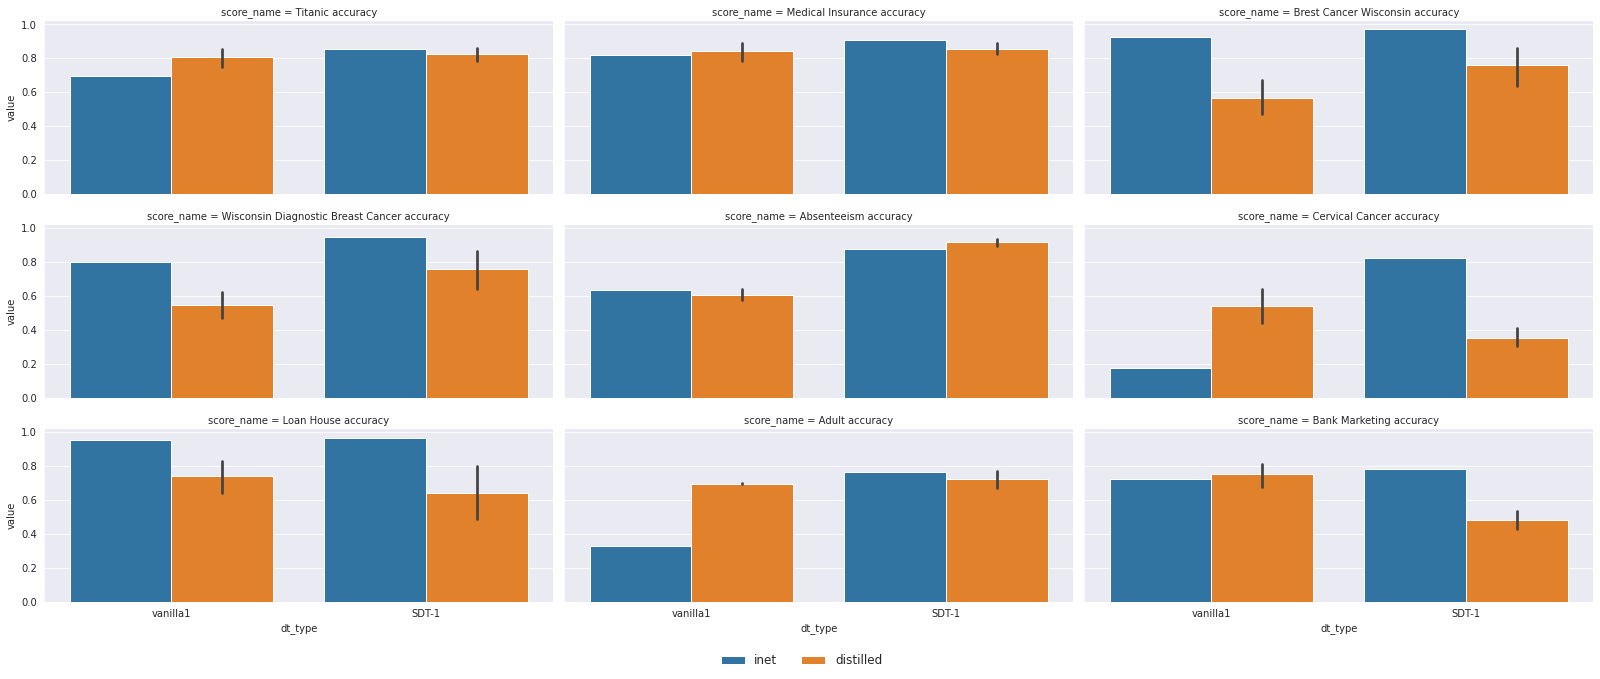

In [21]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_barplot.pdf', bbox_inches = 'tight', pad_inches = 0)


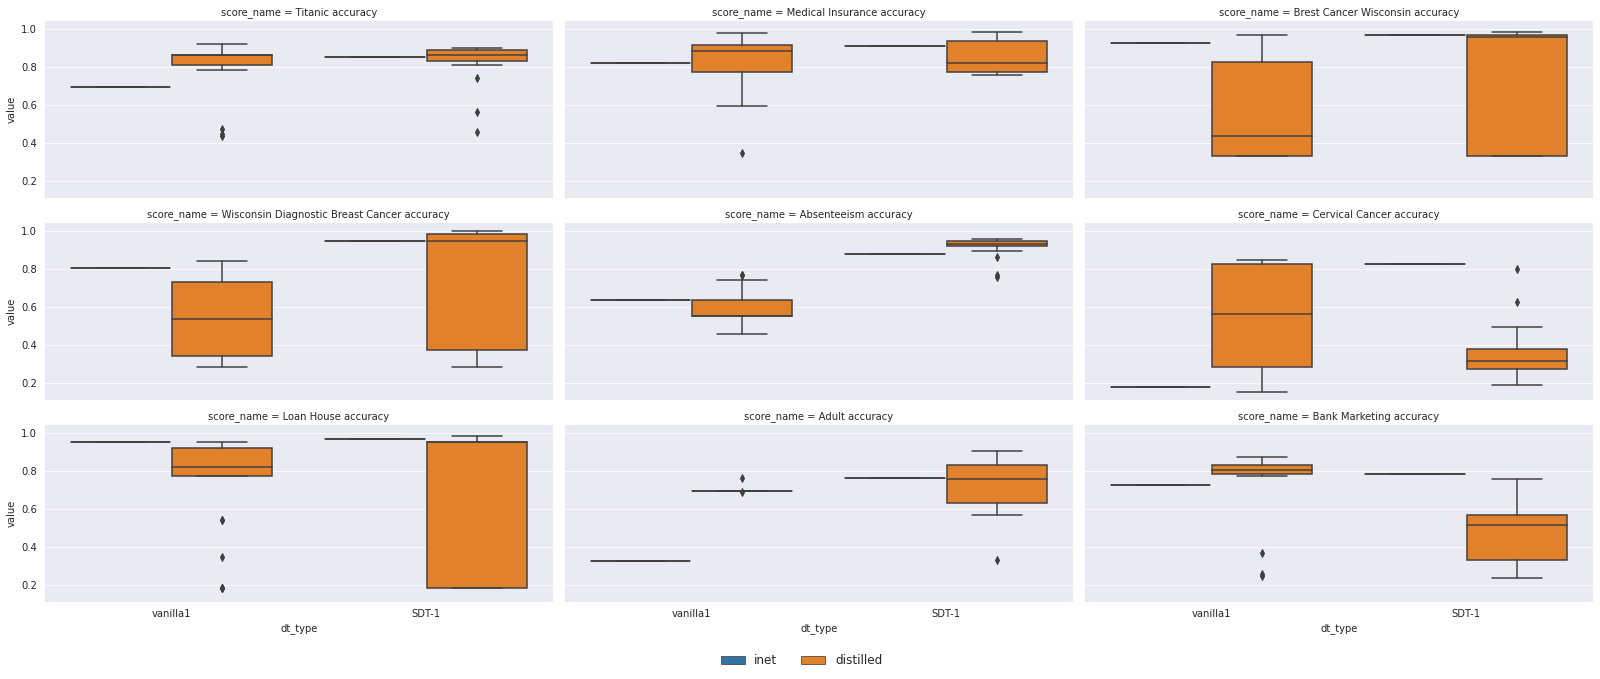

In [22]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.boxplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_boxplot.pdf', bbox_inches = 'tight', pad_inches = 0)


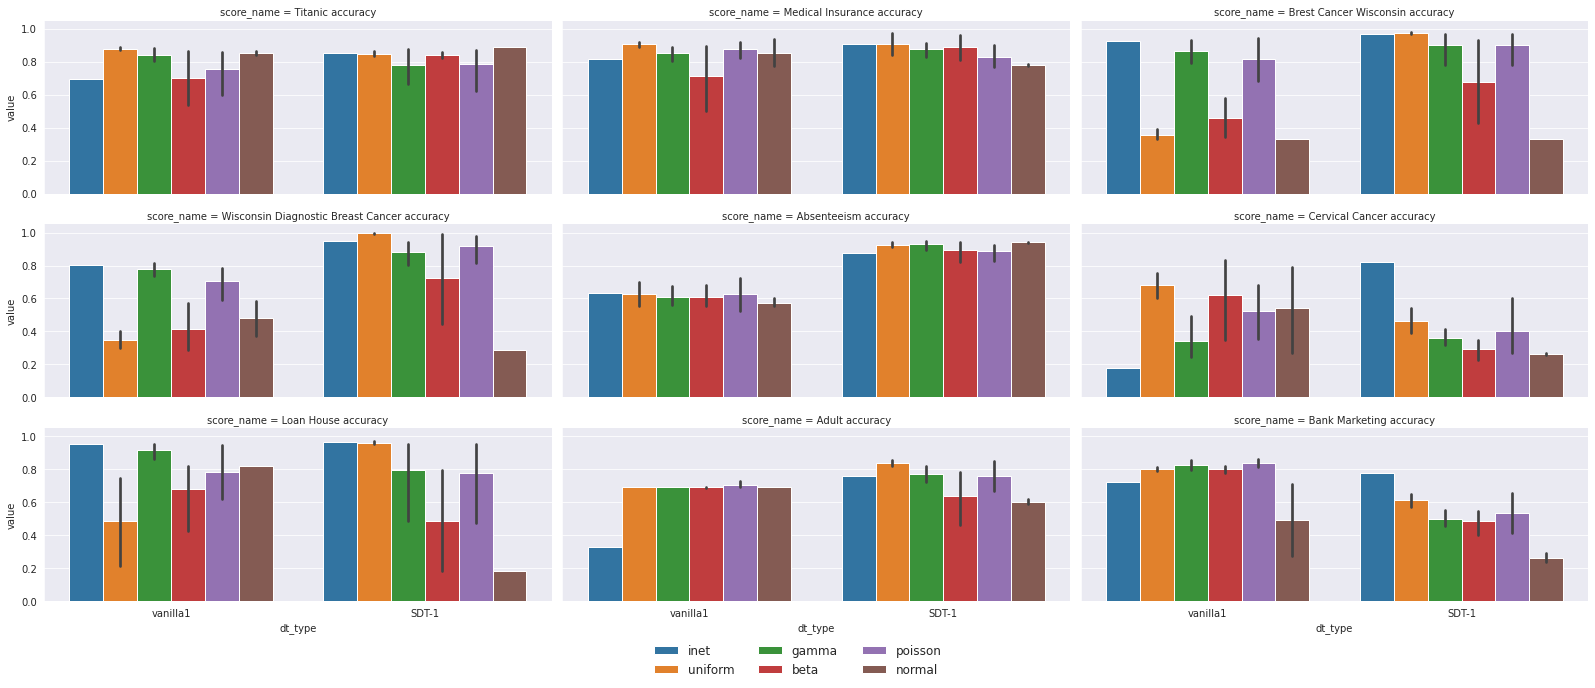

In [23]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'distrib', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_by_distrib_barplot.pdf', bbox_inches = 'tight', pad_inches = 0)


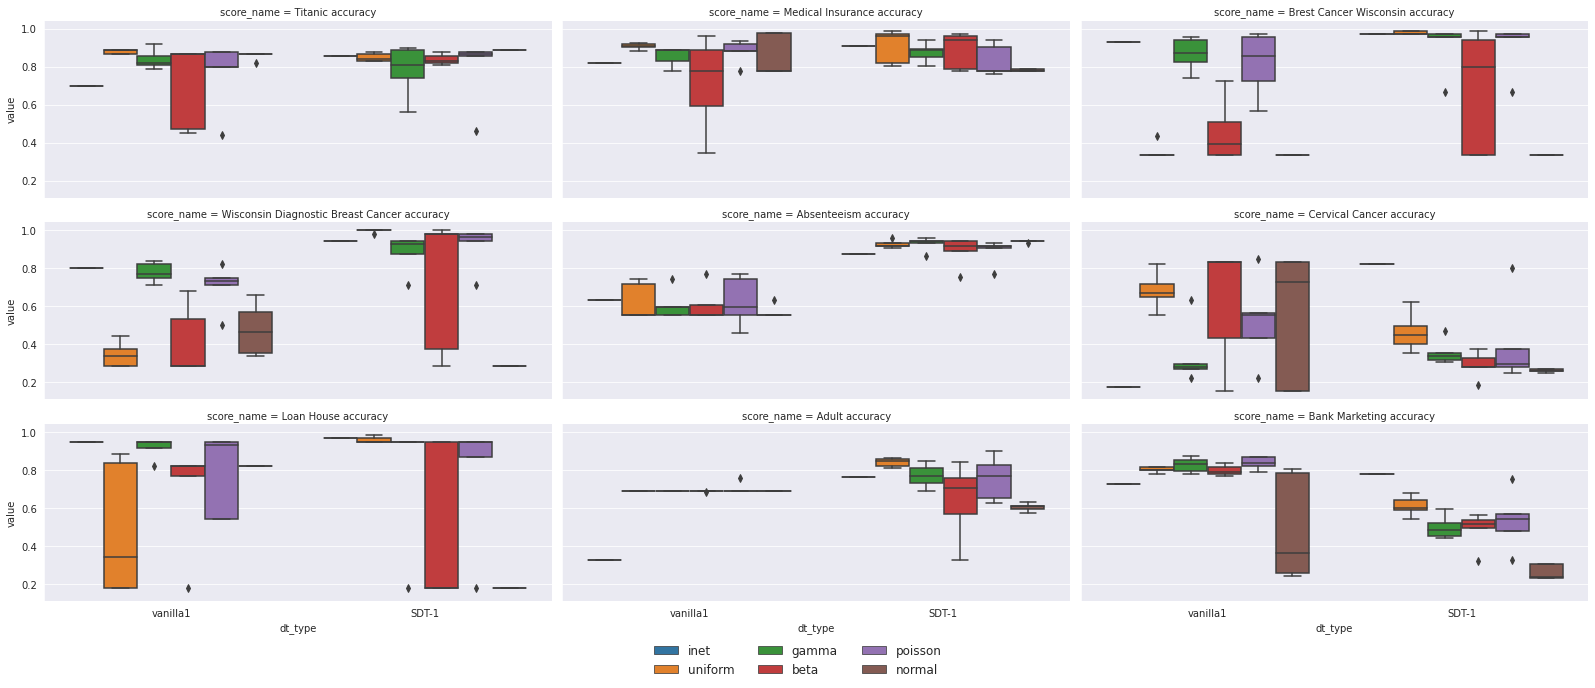

In [24]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'distrib', 
                    plot_type = sns.boxplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_by_distrib_boxplot.pdf', bbox_inches = 'tight', pad_inches = 0)
